In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_excel('data.xlsx')

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
# Turning all the objects into numerical data
df['Gender']=(df['Gender']=='Male').astype(int) # Gender column
# Location column
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])

# Dropping the columns
df.drop(['CustomerID', 'Name'], axis=1, inplace=True)

In [7]:
df.describe()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,1.995840,12.490100,65.053197,274.393650,0.497790
std,15.280283,0.499998,1.411638,6.926461,20.230696,130.463063,0.499998
min,18.000000,0.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,0.000000,1.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,0.000000,2.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,1.000000,3.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,1.000000,4.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


## EDA

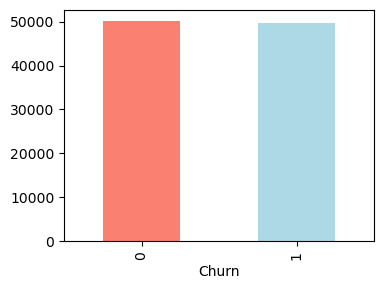

In [9]:
df['Churn'].value_counts().plot(kind='bar', figsize=(4, 3), color=['salmon', 'lightblue']);

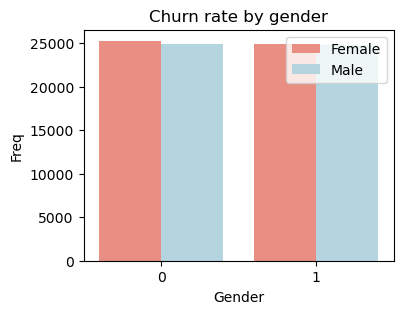

In [10]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Gender', hue='Churn', data=df, palette=['salmon', 'lightblue'])
plt.title('Churn rate by gender')
plt.ylabel('Freq')
plt.legend(['Female', 'Male']);

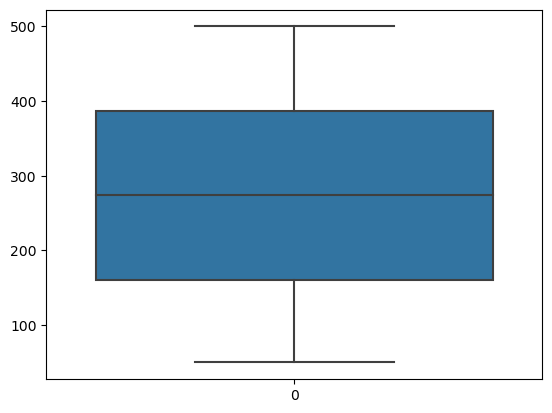

In [11]:
sns.boxplot(df['Total_Usage_GB']);

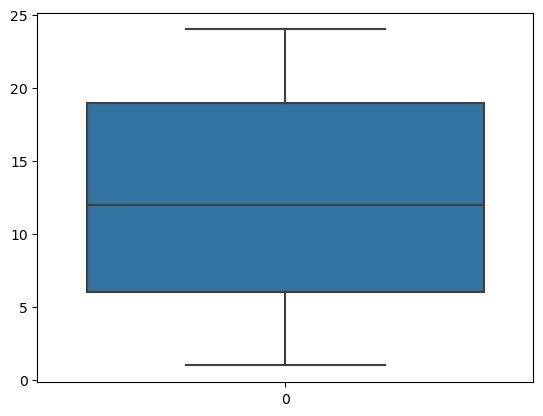

In [12]:
sns.boxplot(df['Subscription_Length_Months']);

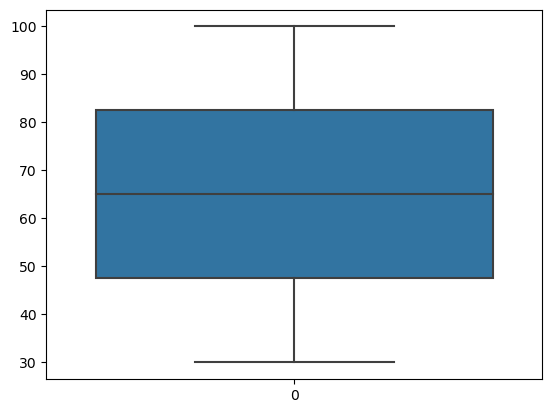

In [13]:
sns.boxplot(df['Monthly_Bill']);

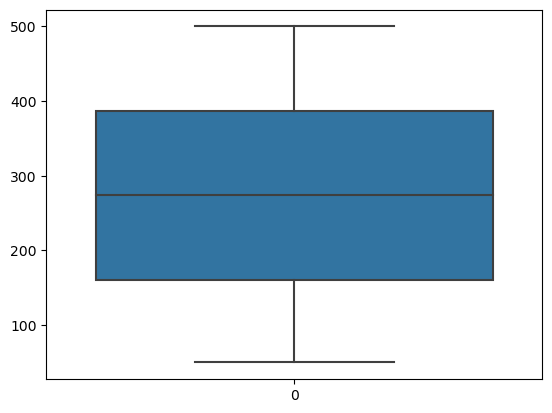

In [14]:
sns.boxplot(df['Total_Usage_GB']);

## Cor mat

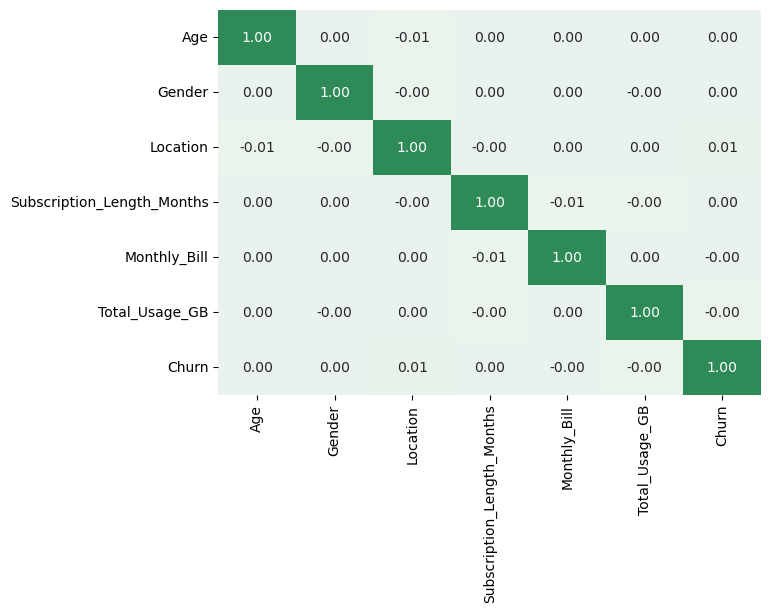

In [15]:
plt.figure(figsize=(7, 5))
cor_mat=df.corr()
cmap=sns.light_palette('seagreen', as_cmap=True)
sns.heatmap(cor_mat, cbar=False, cmap=cmap, annot=True, fmt='.2f');

## Splitting the data

In [16]:
df=df.sample(frac=1, random_state=42)

x=df.drop('Churn', axis=1)
y=df['Churn']

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

## Model building

### Logistic regression

In [18]:
lg_model=LogisticRegression()

lg_model.fit(x_train, y_train);

In [19]:
lg_model.score(x_train, y_train)

0.50315

### RandomForest

In [20]:
rf_model=RandomForestClassifier(max_samples=10000)

rf_model.fit(x_train, y_train);

In [21]:
rf_model.score(x_train, y_train)

0.8203125

### knn

In [22]:
knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train, y_train);

In [23]:
knn_model.score(x_train, y_train)

0.7484875

## Testing and tuning

In [24]:
# scoring function
def scores(y_true, y_preds):
    score={'accuracy_score': accuracy_score(y_true, y_preds),
           'recall_score': recall_score(y_true, y_preds),
           'precision_score': precision_score(y_true, y_preds)}
    return score

### knn

In [25]:
y_preds=knn_model.predict(x_test)

In [26]:
scores(y_test, y_preds)

{'accuracy_score': 0.5045,
 'recall_score': 0.49657188949384956,
 'precision_score': 0.500406421459053}

In [27]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     10082
           1       0.50      0.50      0.50      9918

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



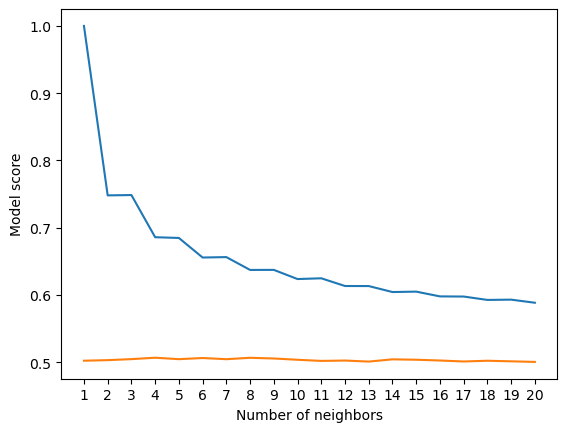

In [28]:
# trying to tune the knn
train_scores=[]
test_scores=[]
model=KNeighborsClassifier(n_jobs=-1)
neighbors=range(1, 21, 1)
for i in neighbors:
    model.set_params(n_neighbors=i)
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))
    
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score");

### logistic regression

In [29]:
y_preds=lg_model.predict(x_test)

In [30]:
scores(y_test, y_preds)

{'accuracy_score': 0.4989,
 'recall_score': 0.39151038515829806,
 'precision_score': 0.4933926302414231}

In [31]:
print(confusion_matrix(y_test, y_preds))

[[6095 3987]
 [6035 3883]]


In [32]:
# Tuning the logistic regression model
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

model=LogisticRegression(n_jobs=-1)
gs_model=GridSearchCV(model, log_reg_grid, cv=5, verbose=True)
gs_model.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
print(gs_model.best_params_)

{'C': 0.0018329807108324356, 'solver': 'liblinear'}


In [34]:
y_preds=gs_model.predict(x_test)
scores(y_test, y_preds)

{'accuracy_score': 0.502,
 'recall_score': 0.3860657390602944,
 'precision_score': 0.49727272727272726}

In [35]:
print(confusion_matrix(y_test, y_preds))

[[6211 3871]
 [6089 3829]]


### RandomForest

In [36]:
y_preds=rf_model.predict(x_test)

In [37]:
scores(y_test, y_preds)

{'accuracy_score': 0.50045,
 'recall_score': 0.4593668078241581,
 'precision_score': 0.49602612955906367}

In [38]:
print(confusion_matrix(y_test, y_preds))

[[5453 4629]
 [5362 4556]]


In [39]:
# Tuning the random forest
params={'n_estimators': np.arange(10, 100, 10),
        'max_samples': [10000, 20000, 50000],
        'max_features': [None, 'sqrt', 'log2'],
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': np.arange(2, 20, 1),
        'min_samples_leaf': np.arange(1, 20, 1)}

model=RandomForestClassifier(n_jobs=-1)
rs_model=RandomizedSearchCV(model, params, cv=5, verbose=True, n_iter=10)
rs_model.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [40]:
print(rs_model.best_params_)

{'n_estimators': 50, 'min_samples_split': 18, 'min_samples_leaf': 16, 'max_samples': 50000, 'max_features': None, 'max_depth': 5}


In [41]:
model=RandomForestClassifier(n_estimators=90, min_samples_split=10, min_samples_leaf=15, max_samples=50000, max_features=None, max_depth=5)

In [42]:
model.fit(x_train, y_train)
y_preds=model.predict(x_test)

In [43]:
scores(y_test, y_preds)

{'accuracy_score': 0.49805,
 'recall_score': 0.40774349667271625,
 'precision_score': 0.49263004019978074}

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54     10082
           1       0.49      0.41      0.45      9918

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



In [45]:
print(confusion_matrix(y_test, y_preds))

[[5917 4165]
 [5874 4044]]


## Saving the model

In [46]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

## Feature importance

In [47]:
model=RandomForestClassifier(max_samples=10000, n_jobs=-1)
model.fit(x_train, y_train);

In [48]:
feature_imp=dict(zip(df.columns, list(model.feature_importances_)))
feature_imp

{'Age': 0.1981944040605128,
 'Gender': 0.024620574534735026,
 'Location': 0.06031471731804039,
 'Subscription_Length_Months': 0.15260611718036562,
 'Monthly_Bill': 0.2906424470410088,
 'Total_Usage_GB': 0.2736217398653374}

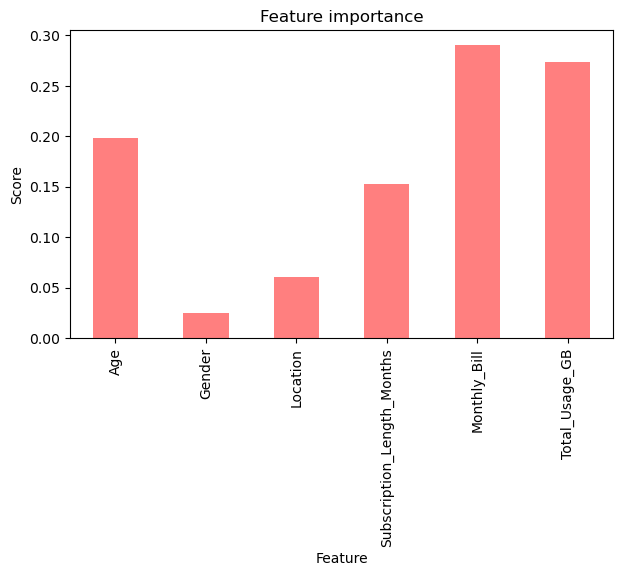

In [49]:
feature_imp=pd.DataFrame(feature_imp, index=[0])
feature_imp.T.plot(color='red', legend=False, kind='bar', alpha=0.5, figsize=(7, 4))
plt.title('Feature importance')
plt.xlabel('Feature')
plt.ylabel('Score');